wanted gammasph
fmeat bwmwmrdc28
runtodo ['bwmwmrdc28']
rundir mw_cr_mr_dc28_2_21_M1_c1000
runtodo bwmwmrdc28
rundir mw_cr_mr_dc28_2_21_M1_c1000
rundir mw_cr_mr_dc28_2_21_M1_c1000
loading file : /home/tkc004/oasis/bw/mw/mw_cr_mr_dc28_2_21_M1_c1000//output//snapshot_500.hdf5
npart_file:  [3232779 3500000 2000000 1000000  637386       1]
npart_total: [3232779 3500000 2000000 1000000  637386       1]
flag_cooling 1
this time 0.5
hubble 1.0
loading file : /home/tkc004/oasis/bw/mw/mw_cr_mr_dc28_2_21_M1_c1000//output//snapshot_500.hdf5
npart_file:  [3232779 3500000 2000000 1000000  637386       1]
npart_total: [3232779 3500000 2000000 1000000  637386       1]
flag_cooling 1
xvcen, yvcen, zvcen 0 0 0
rundir mw_cr_mr_dc28_2_21_M1_c1000
Gnism_in_cm_3l [0.04966217 0.08254595 0.08363825 0.07573811 0.0659923  0.05007024
 0.0559547  0.06148654 0.06762121 0.08407696 0.07804705 0.06949237
 0.05193255 0.04504387 0.04696904 0.05236702 0.07607186 0.06401402
 0.0582204  0.05629194 0.06204759 0.06729758 0

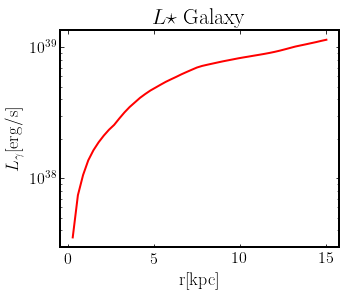

In [3]:
from samson_const import *
import matplotlib as mpl
#mpl.use('Agg')
from readsnap_cr import readsnapcr
import Sasha_functions as SF
import graphics_library as GL
import gas_temperature as GT
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from samson_functions import *
from matplotlib import rcParams
from pylab import *
from textwrap import wrap
#rcParams['figure.figsize'] = 5, 5
rcParams['figure.figsize'] = 10, 5
rcParams['font.size']=18
rcParams['font.family']='serif'
rcParams['text.usetex']=True
#rcParams.update({'figure.autolayout': True})
import matplotlib.patches as patches
rcParams['axes.linewidth'] = 2
rcParams['pdf.fonttype'] = 42
rcParams['ps.fonttype'] = 42
rcParams['ps.useafm'] = True
rcParams['pdf.use14corefonts'] = True
rcParams['axes.unicode_minus']=False
colortable = [ 'b', 'g', 'r']
dirneed=['bwmwmrdc28']
fmeat=dirneed[-1]

startno=490
Nsnap=500
snapsep=10
wanted='gammasph'
title='MW'
titleneed=title
needlog=0
dclabelneed=1
correctIa=0
useM1=1
the_prefix='snapshot'
the_suffix='.hdf5'
withinr=15.0
nogrid=40
maxlength=10.0
med = -0.1 
wholeboxgas=1
diskgas=1
Rfrac = 0.5
nosum=0
xaxis_snapno=0
print 'wanted', wanted
print 'fmeat', fmeat
print 'runtodo', dirneed


if wanted=='gammasph':
    rcParams['figure.figsize'] = 5,4
    withinr = 15. #kpc
    nogrid=50
    usecen=1
    newlabelneed=1
    dr = withinr/nogrid
    from crtestfunction import *
    for runtodo in dirneed:
        info=outdirname(runtodo, Nsnap)
        havecr=info['havecr']
        if havecr==0:
            continue
        print 'runtodo', runtodo
        radl = np.linspace(dr,withinr,num=nogrid)
        Lgammalist=radl*0.
        nooftimes=0
        for i in range(startno,Nsnap,snapsep):
            info=outdirname(runtodo, i)
            rundir=info['rundir']
            runtitle=info['runtitle']
            slabel=info['slabel']
            snlabel=info['snlabel']
            dclabel=info['dclabel']
            resolabel=info['resolabel']
            the_snapdir=info['the_snapdir']
            Nsnapstring=info['Nsnapstring']
            havecr=info['havecr']
            Fcal=info['Fcal']
            iavesfr=info['iavesfr']
            timestep=info['timestep']
            maindir=info['maindir']
            haveB=info['haveB']
            color=info['color']
            newlabel=info['newlabel']
            cosmo=info['cosmo']
            ptitle=title
            if runtitle=='SMC':
                labelneed=dclabel
                if newlabelneed==1:
                    labelneed="\n".join(wrap(newlabel,17))
            else:
                labelneed=''
            if runtitle=='SMC':
                ptitle='Dwarf'
            elif runtitle=='SBC':
                ptitle='Starburst'
            elif runtitle=='MW':
                ptitle=r'$L\star$ Galaxy'
            if haveB==0:
                lsn='solid'
            else:
                lsn='dashed'
            if cosmo==1:
                datasup=0;
            else:
                datasup=1;
            G = readsnapfromrun(runtodo,Nsnap,1,rotface=0,datasup=datasup)
            Gp = G['p']; Grho = G['rho']; Gu = G['u']; Gm = G['m']; cregy = G['cregy']; Neb=G['ne'] #cosmic ray energy in 1e10Msun km^2/sec^2
            #Gnism = (0.78+0.22*Neb*0.76)/1.67e-24*Grho*1e10*1.99e33/3.086e21/3.086e21/3.086e21 #gas number density in ISM 
            Gz = Gp[:,2]; Gx = Gp[:,0]; Gy = Gp[:,1];
            outdata=outLgamma_nism(Grho,Neb,cregy)
            Lgamma=outdata['Lgamma']
            print 'Lgamma', Lgamma
            for irad in range(nogrid):
                cut = (Gx*Gx+Gy*Gy+Gz*Gz < radl[irad])
                Lgammacut = Lgamma[cut]
                Lgammalist[irad]+=np.sum(Lgammacut)
            nooftimes+=1
        Lgammalist=Lgammalist/nooftimes
        plt.plot(radl, Lgammalist, label=labelneed,color=color,ls=lsn,lw=2)
    plt.xlabel(r'${\rm r [kpc]}$',fontsize=18)
    plt.ylabel(r'$L_{\gamma} [{\rm erg/s}]$',fontsize=18)
    plt.yscale('log')
    plt.title(ptitle)
    if runtitle=='SMC':
        plt.legend(loc='best',fontsize=10,ncol=2)
    plt.tick_params(axis='both', which='both',direction='in',bottom=True,top=True,left=True,right=True,labelsize=16)
    plt.savefig('CRplot/gammasph/gammasph_'+fmeat+'.pdf',bbox_inches='tight')
    plt.clf()